# Python の応用1 〜数値シミュレーション〜

この章では, これまで学習した知識を用いて初歩的な数値シミュレーションを行う. 
本章と次章を学習することによって, 最終的には, 野球ボールの軌道を計算できるようになることを目標とする. 

多くの数値シミュレーションは, 
解析的に解くことのできない微分方程式を数値的に解く問題に帰着する. 
まずは微分方程式を数値的に解く最も簡単なオイラー法について少し学習し, 
その後, 実際の問題に適用する. 

## 常微分方程式とオイラー近似

一階の微分方程式

$$
\frac{dx}{dt}=f(x,t)
$$

を数値的に解くことを考える。
計算機は離散的な値しか扱うことができないので、微分方程式を差分方程式に近似する。
その最も単純な近似が次のオイラー法である。

$$
\frac{x_{n+1}-x_{n}}{\Delta t}=f(x_n,t_n).
$$

ここで、$\Delta t$を十分に小さい時間刻み幅として、
第 $n$ ステップにおける$t, x$をそれぞれ $t_n(=n \Delta t), x_n$ としている。
初期条件 $x(0)=x_0$ を与えた上で、 $n=0, 1, 2, \cdots$に対して

$$
x_{n+1}=x_{n}+f(x_n,t_n)\Delta t
$$  

として逐次 $x_n$ を求めていく。

以下の例では, 常微分方程式
$$
\frac{dx}{dt}=ax, \ \ \ x(0)=1
$$

を数値的に解いている.  
なお, この方程式の解析解は
$$
x(t)=\exp(at)
$$

で与えられる.

### $\frac{dx}{dt} = ax$ のシミュレーション

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
n = 1000 # ステップ数
dt = 0.01 # tの刻み幅
a = 1.0 # a の値

# 初期条件
x0 = 1.0
# t, x の値を格納するリスト
t_list = []
x_list = []
x_exact = [] # 解析解を格納するリスト

# t=0 では x=x0
t = 0.0
x = x0

# 値を格納する。
t_list.append(t)
x_list.append(x)
x_exact.append(x)

for i in range(n):
    f = a * x # 右辺を予め計算する。
    x = x + f * dt # Euler 法による時間発展
    t = t + dt # 時刻をdtだけ進める。
    
    # 計算した x, t の格納
    t_list.append(t)
    x_list.append(x)
    x_exact.append(np.exp(a*t))

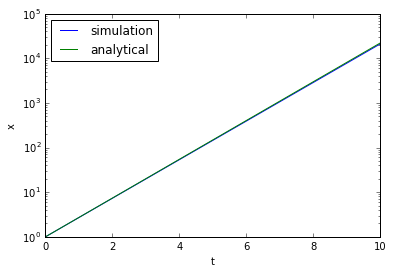

In [3]:
# グラフに結果を描画する。
plt.plot(t_list, x_list, label='simulation')
plt.plot(t_list, x_exact, label='analytical')
plt.xlabel('t')
plt.ylabel('x')
plt.yscale('log')
# 凡例を表示する。
plt.legend(loc='best')

### 課題 1

上記の例について, $\Delta t$ = 0.01, 0.1 および $\Delta t$ = 1.0 についてそれぞれ計算し, その結果を描画することで
$\Delta t$ の大きさが微分方程式の数値解にどのような影響を及ぼすか考察せよ.

### 課題 2

あらかじめ解析解の分かっている常微分方程式を何でもよいので一つ取り上げ, これを数値的に解いた場合の誤差を評価せよ.

例えば、減衰振動の微分方程式は以下のように表される。 
$$
\frac{d^2x}{dt^2} + 2\xi\omega_0\frac{dx}{dt} + \omega_0^2 x = 0
$$

この常微分方程式の解析解は
0 < ζ < 1のとき以下のように表される.
$$
x(t)=Ce^{{-\zeta \omega _{0}t}}\cos \left(\omega _{0}{\sqrt  {1-\zeta ^{2}}}t-\alpha \right)
$$

ただし、
$$
C=x_{0}{\sqrt  {1+\left({\frac  {\sigma +\zeta }{{\sqrt  {1-\zeta ^{2}}}}}\right)^{2}}}
$$
および
$$
\alpha =\tan ^{{-1}}\left(-{\frac  {\sigma +\zeta }{{\sqrt  {1-\zeta ^{2}}}}}\right)
$$
である。

[https://ja.wikipedia.org/wiki/%E6%B8%9B%E8%A1%B0%E6%8C%AF%E5%8B%95]

## Lorenz 方程式

気象学者のLorenzは1963年に熱対流の近似モデルとして
以下の方程式を提案した(Lorenz方程式)
> Lorenz, E. N., 'Deterministic nonperiodic flow', *J. Atms. Sci.* **20**, pp.130-141, (1963).

$$
\begin{array}{ccc}
\dfrac{dx}{dt}&=&-ax+ay \\[3pt]
\dfrac{dy}{dt}&=&\mu x-y-xz \\[3pt]
\dfrac{dz}{dt}&=&-bz+xy \\[3pt]
\end{array}
$$

Lorenzは数値計算により, この方程式の解が
不規則で周期性をもたない振動をすることを発見した.
決定論的な微分方程式の解がこのような予測不可能は振舞いを示すことは驚きをもって受け止められ,
現在ではこのような非周期運動はカオスと呼ばれている.

なお, Lorenz方程式は自明解 $x=y=z=0$ の他に,
$\mu >1$ のとき, 定常解 $x=y=\pm \sqrt{b(\mu-1)}, z=\mu-1$ をもつ.

![Lorenz方程式の数値解](figs/lorenz.jpg)


### 課題 3
+ $a=10, b=8/3$ と固定した上で, Lorenz方程式のシミュレーションを実施せよ.  
$\mu$ を $0, 1, 3, 10, 30,...$ の条件でシミュレーションを行い, どのような解が現れるか調べよ.  
$x, y, z$ の時間変化を示すグラフや上のような $xyz$ 空間における軌跡などをプロットしてみるとよい.
+ 初期値がわずかに(例えば1％程度)異なる2ケースのシミュレーション結果を比較せよ. 

なお、3次元グラフは
```python
from mpl_toolkits.mplot3d import Axes3D

ax = plt.subplot(111, projection='3d')
ax.plot(x, y, z)
```
のようにして表示することができる。

より大きく描画するためには

```python
from mpl_toolkits.mplot3d import Axes3D

plt.figure(figsize=(10, 10))
ax = plt.subplot(111, projection='3d')
ax.plot(x, y, z)
```
